# Identitas Diri

Nama : Mohammad Dimas Noufal \
Email : dimasnoufal26@gmail.com \
Learning Path : Belajar Pengembangan Machine Learning \
Materi : Proyek Akhir : Image Classification Model Deployment \

# Import (Library)

In [1]:
import zipfile
import os
import shutil
import pathlib
import tensorflow as tf

!pip install split-folders
import splitfolders as sf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow import keras
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset (Kaggle)

In [2]:
os.environ['KAGGLE_USERNAME'] = 'mohammaddimasnoufal'
os.environ['KAGGLE_KEY']      = 'e581a5892989a998495d96ef77108e01'

!kaggle datasets download -d kmader/food41

100% 5.30G/5.30G [00:45<00:00, 46.9MB/s]
100% 5.30G/5.30G [00:45<00:00, 124MB/s] 


In [3]:
local_zip = '/content/food41.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('food41')
zip_ref.close()

In [5]:
baseDir = 'food41/images'
labels = os.listdir(baseDir)
labels

['grilled_cheese_sandwich',
 'baby_back_ribs',
 'macarons',
 'bruschetta',
 'chicken_wings',
 'hummus',
 'fish_and_chips',
 'eggs_benedict',
 'sashimi',
 'miso_soup',
 'tacos',
 'edamame',
 'onion_rings',
 'baklava',
 'croque_madame',
 'spring_rolls',
 'waffles',
 'red_velvet_cake',
 'fried_calamari',
 'pad_thai',
 'breakfast_burrito',
 'paella',
 'lobster_bisque',
 'beignets',
 'caesar_salad',
 'pulled_pork_sandwich',
 'poutine',
 'shrimp_and_grits',
 'cheesecake',
 'french_toast',
 'macaroni_and_cheese',
 'mussels',
 'risotto',
 'crab_cakes',
 'nachos',
 'beef_tartare',
 'ceviche',
 'donuts',
 'hamburger',
 'gyoza',
 'lasagna',
 'pizza',
 'bibimbap',
 'lobster_roll_sandwich',
 'scallops',
 'spaghetti_carbonara',
 'churros',
 'escargots',
 'hot_and_sour_soup',
 'chicken_curry',
 'omelette',
 'frozen_yogurt',
 'spaghetti_bolognese',
 'hot_dog',
 'cannoli',
 'pancakes',
 'steak',
 'seaweed_salad',
 'tiramisu',
 'club_sandwich',
 'grilled_salmon',
 'french_onion_soup',
 'foie_gras',
 'ch

In [6]:
def remove_label(label):
  shutil.rmtree(os.path.join(baseDir, label))
  labels.remove(label)

In [7]:
remove_label('chicken_wings')
remove_label('hummus')
remove_label('fish_and_chips')
remove_label('eggs_benedict')
remove_label('sashimi')
remove_label('miso_soup')
remove_label('tacos')
remove_label('edamame')
remove_label('onion_rings')
remove_label('baklava')
remove_label('croque_madame')
remove_label('spring_rolls')
remove_label('waffles')
remove_label('red_velvet_cake')
remove_label('fried_calamari')
remove_label('pad_thai')
remove_label('breakfast_burrito')
remove_label('paella')
remove_label('lobster_bisque')
remove_label('beignets')
remove_label('caesar_salad')
remove_label('pulled_pork_sandwich')
remove_label('poutine')
remove_label('shrimp_and_grits')
remove_label('cheesecake')
remove_label('french_toast')
remove_label('macaroni_and_cheese')
remove_label('mussels')
remove_label('risotto')
remove_label('crab_cakes')
remove_label('nachos')
remove_label('beef_tartare')
remove_label('ceviche')
remove_label('donuts')
remove_label('hamburger')
remove_label('gyoza')
remove_label('lasagna')
remove_label('pizza')
remove_label('bibimbap')
remove_label('lobster_roll_sandwich')
remove_label('scallops')
remove_label('spaghetti_carbonara')
remove_label('churros')
remove_label('escargots')
remove_label('hot_and_sour_soup')
remove_label('chicken_curry')
remove_label('omelette')
remove_label('frozen_yogurt')
remove_label('spaghetti_bolognese')
remove_label('hot_dog')
remove_label('cannoli')
remove_label('pancakes')
remove_label('steak')
remove_label('seaweed_salad')
remove_label('tiramisu')
remove_label('club_sandwich')
remove_label('grilled_salmon')
remove_label('french_onion_soup')
remove_label('foie_gras')
remove_label('chicken_quesadilla')
remove_label('beef_carpaccio')
remove_label('greek_salad')
remove_label('carrot_cake')
remove_label('prime_rib')
remove_label('cheese_plate')
remove_label('pork_chop')
remove_label('deviled_eggs')
remove_label('apple_pie')
remove_label('huevos_rancheros')
remove_label('tuna_tartare')
remove_label('strawberry_shortcake')
remove_label('chocolate_mousse')
remove_label('falafel')
remove_label('caprese_salad')
remove_label('beet_salad')
remove_label('dumplings')
remove_label('bread_pudding')
remove_label('french_fries')
remove_label('guacamole')
remove_label('samosa')
remove_label('chocolate_cake')
remove_label('peking_duck')
remove_label('pho')
remove_label('garlic_bread')
remove_label('fried_rice')
remove_label('panna_cotta')
remove_label('oysters')
remove_label('takoyaki')
remove_label('ravioli')
remove_label('ice_cream')
remove_label('cup_cakes')
remove_label('sushi')
remove_label('creme_brulee')
remove_label('ramen')
remove_label('clam_chowder')
remove_label('filet_mignon')
remove_label('gnocchi')

labels

['grilled_cheese_sandwich', 'baby_back_ribs', 'macarons', 'bruschetta']

In [8]:
sf.ratio(
    baseDir,
    output = os.path.join('food41/image'),
    seed   = None,
    ratio  = (0.8, 0.2)
)

Copying files: 4000 files [00:06, 620.26 files/s] 


In [12]:
imageDir = 'food41/image'

trainDirBaby = os.path.join(imageDir, 'train/baby_back_ribs')
trainDirBrus = os.path.join(imageDir, 'train/bruschetta')
trainDirGrilled = os.path.join(imageDir, 'train/grilled_cheese_sandwich')
trainDirMacarons = os.path.join(imageDir, 'train/macarons')

valDirBaby = os.path.join(imageDir, 'val/baby_back_ribs')
valDirBrus = os.path.join(imageDir, 'val/bruschetta')
valDirGrilled = os.path.join(imageDir, 'val/grilled_cheese_sandwich')
valDirMacarons = os.path.join(imageDir, 'val/macarons')

# Train set dan Val set

In [13]:
trainSet = (
      len(os.listdir(trainDirBaby))
    + len(os.listdir(trainDirBrus))
    + len(os.listdir(trainDirGrilled))
    + len(os.listdir(trainDirMacarons))
)

valSet = (
      len(os.listdir(valDirBaby))
    + len(os.listdir(valDirBrus))
    + len(os.listdir(valDirGrilled))
    + len(os.listdir(valDirMacarons))
)

print(f'Train Set      : {trainSet}')
print(f'Validation Set : {valSet}')

Train Set      : 3200
Validation Set : 800


In [14]:
trainDir = os.path.join(imageDir, 'train')
valDir   = os.path.join(imageDir, 'val')

print(os.listdir(trainDir))
print(os.listdir(valDir))

['grilled_cheese_sandwich', 'baby_back_ribs', 'macarons', 'bruschetta']
['grilled_cheese_sandwich', 'baby_back_ribs', 'macarons', 'bruschetta']


# Train

In [15]:
trainDatagen = ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 30,
    shear_range        = 0.2,
    zoom_range         = 0.2,
    horizontal_flip    = True,
    fill_mode          = 'nearest',
)

valDatagen = ImageDataGenerator(
    rescale         = 1./255
)

In [16]:
trainGen = trainDatagen.flow_from_directory(
    trainDir,
    target_size = (200, 200),
    batch_size  = 50,
    shuffle     = True,
    color_mode  = 'rgb',
    class_mode  = 'categorical',
)

valGen = valDatagen.flow_from_directory(
    valDir,
    target_size = (200, 200),
    batch_size  = 50,
    shuffle     = True,
    color_mode  = 'rgb',
    class_mode  = 'categorical',
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [17]:
baseModel = Xception(weights="imagenet", include_top=False, input_shape=(200, 200, 3))

baseModel.trainable = False

baseModel.summary()
print(f'Base Model Layer : {len(baseModel.layers)}')

83683744/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

In [18]:
model = Sequential([
    baseModel,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 8,196
Non-trainable params: 20,861,480
_________________________________________________________________


In [19]:
model.compile(
    optimizer = 'adam',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.90 and logs.get('val_accuracy') >= 0.90:
      print('\nAccuracy and Validation Accuracy reach > 90%')
      self.model.stop_training = True

callbacks = myCallback()

reduceLROP   = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3)

In [30]:
epoch = 10

history = model.fit(
    trainGen,
    epochs           = epoch,
    validation_data  = valGen,
    verbose          = 2,
    callbacks        = [callbacks]
)

Epoch 1/10
64/64 - 801s - loss: 0.3205 - accuracy: 0.8891 - val_loss: 0.3040 - val_accuracy: 0.8838 - 801s/epoch - 13s/step
Epoch 2/10
64/64 - 837s - loss: 0.2951 - accuracy: 0.8956 - val_loss: 0.2823 - val_accuracy: 0.8938 - 837s/epoch - 13s/step
Epoch 3/10
64/64 - 838s - loss: 0.2856 - accuracy: 0.8984 - val_loss: 0.2741 - val_accuracy: 0.8975 - 838s/epoch - 13s/step
Epoch 4/10
64/64 - 787s - loss: 0.2613 - accuracy: 0.9053 - val_loss: 0.2906 - val_accuracy: 0.8900 - 787s/epoch - 12s/step
Epoch 5/10
64/64 - 840s - loss: 0.2521 - accuracy: 0.9103 - val_loss: 0.2790 - val_accuracy: 0.8963 - 840s/epoch - 13s/step
Epoch 6/10
64/64 - 839s - loss: 0.2440 - accuracy: 0.9109 - val_loss: 0.2709 - val_accuracy: 0.8963 - 839s/epoch - 13s/step
Epoch 7/10
64/64 - 836s - loss: 0.2295 - accuracy: 0.9150 - val_loss: 0.2789 - val_accuracy: 0.8900 - 836s/epoch - 13s/step
Epoch 8/10
64/64 - 840s - loss: 0.2235 - accuracy: 0.9175 - val_loss: 0.2735 - val_accuracy: 0.8963 - 840s/epoch - 13s/step
Epoch 9/

# Grafik


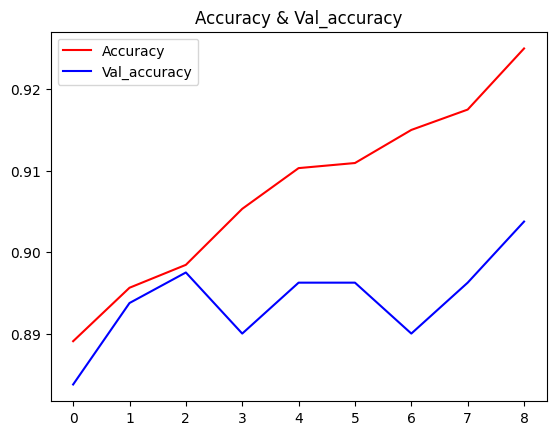

<Figure size 640x480 with 0 Axes>

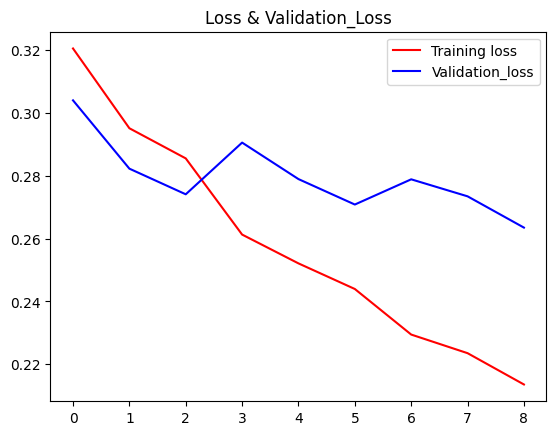

<Figure size 640x480 with 0 Axes>

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Accuracy')
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')
plt.title('Accuracy & Val_accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Loss & Validation_Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [34]:
print(trainGen.class_indices)

{'baby_back_ribs': 0, 'bruschetta': 1, 'grilled_cheese_sandwich': 2, 'macarons': 3}


# Validasi Photo

Saving 1005066.jpg to 1005066 (8).jpg
1/1 [==============================] - 0s 220ms/step
1005066.jpg
baby_back_ribs


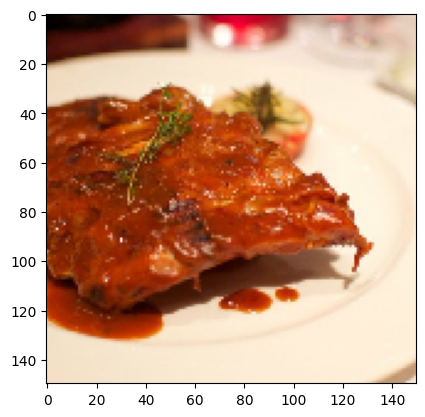

In [53]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=32)
  print(fn)
  if classes.all() == 0:
        print('baby_back_ribs')
  elif classes.all() == 1:
      print('bruschetta')
  elif classes.all() == 2:
      print('grilled_cheese_sandwich')
  elif classes.all() == 3:
      print('macarons')
  else:
      print('Unclassified')

# TF-Lite

In [54]:
exportDir = 'saved_model/'
tf.saved_model.save(model, exportDir)

converter    = tf.lite.TFLiteConverter.from_saved_model(exportDir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as t:
    t.write(tflite_model)